## Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Step:1 Load The Data

In [2]:
ipl_22=pd.read_excel("M:/DataSets/ipl_22.xlsx", index_col=0)

In [3]:
ipl_22.columns

Index(['date', 'venue', 'team1', 'team2', 'stage', 'toss_winner',
       'toss_decision', 'first_ings_score', 'first_ings_wkts',
       'second_ings_score', 'second_ings_wkts', 'match_winner', 'won_by',
       'margin', 'player_of_the_match', 'top_scorer', 'highscore',
       'best_bowling', 'best_bowling_figure'],
      dtype='object')

In [4]:
# descriptive Statistics ...
ipl_22.describe()

,first_ings_score,first_ings_wkts,second_ings_score,second_ings_wkts,margin,highscore
count,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000
mean,171.121622,6.135135,158.540541,6.175676,16.972973,71.716216
std,29.048355,2.222699,29.299207,2.639832,19.651047,20.705052
min,68.000000,0.000000,72.000000,1.000000,2.000000,28.000000
25%,154.250000,5.000000,142.750000,4.000000,5.250000,57.000000
50%,169.500000,6.000000,160.000000,6.000000,8.000000,68.000000
75%,192.750000,8.000000,176.000000,8.000000,18.000000,87.750000
max,222.000000,10.000000,211.000000,10.000000,91.000000,140.000000


## Step-2: Check for Null Values

In [5]:
# using na
ipl_22.isna().sum()

date                   0
venue                  0
team1                  0
team2                  0
stage                  0
toss_winner            0
toss_decision          0
first_ings_score       0
first_ings_wkts        0
second_ings_score      0
second_ings_wkts       0
match_winner           0
won_by                 0
margin                 0
player_of_the_match    1
top_scorer             0
highscore              0
best_bowling           0
best_bowling_figure    0
dtype: int64

#### check for missing values with the help of sns heatmap

<AxesSubplot:ylabel='match_id'>

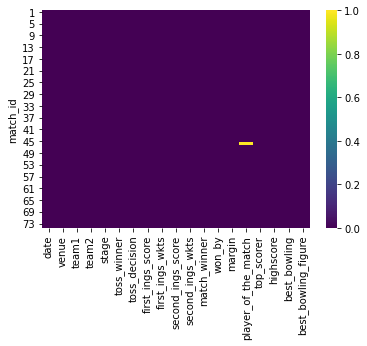

In [6]:
sns.heatmap(ipl_22.isnull(),cmap='viridis')

As we see in the above plot there is only one bright yellow stride it points to the data missing.

In [7]:
ipl_22[ipl_22['player_of_the_match'].isnull()]
## we can fill that value with topscorer..

,date,venue,team1,team2,stage,toss_winner,toss_decision,first_ings_score,first_ings_wkts,second_ings_score,second_ings_wkts,match_winner,won_by,margin,player_of_the_match,top_scorer,highscore,best_bowling,best_bowling_figure
match_id,,,,,,,,,,,,,,,,,,,
46,2022-05-01 00:00:00,"Maharashtra Cricket Association Stadium,Pune",Chennai,Hyderabad,Group,Hyderabad,Field,202,2,189,6,Chennai,Runs,13,NaN,Ruturaj Gaikwad,99,Mukesh Choudhary,4--46


#### Filling NA Values 

In [8]:
# using fillna(value) to fill any value or dropna() to remove NULL valued rows/columns.
ipl_22.player_of_the_match.fillna('Ruturaj Gaikwad',inplace=True)

In [9]:
ipl_22.iloc[45]

date                                            2022-05-01 00:00:00
venue                  Maharashtra Cricket Association Stadium,Pune
team1                                                       Chennai
team2                                                     Hyderabad
stage                                                         Group
toss_winner                                               Hyderabad
toss_decision                                                 Field
first_ings_score                                                202
first_ings_wkts                                                   2
second_ings_score                                               189
second_ings_wkts                                                  6
match_winner                                                Chennai
won_by                                                         Runs
margin                                                           13
player_of_the_match                             

##   Data Cleaning
   1. check for compatability of values in each column i.e check for data types 

In [10]:
ipl_22.date
## we can see values not in a sutibale way and date is not needed cause of match id..

match_id
1     2022-03-26 00:00:00
2     2022-03-27 00:00:00
3     2022-03-27 00:00:00
4     2022-03-28 00:00:00
5     2022-03-29 00:00:00
             ...         
70            May 22,2022
71            May 24,2022
72            May 25,2022
73            May 27,2022
74            May 29,2022
Name: date, Length: 74, dtype: object

In [11]:
ipl_22.head(5)

,date,venue,team1,team2,stage,toss_winner,toss_decision,first_ings_score,first_ings_wkts,second_ings_score,second_ings_wkts,match_winner,won_by,margin,player_of_the_match,top_scorer,highscore,best_bowling,best_bowling_figure
match_id,,,,,,,,,,,,,,,,,,,
1,2022-03-26 00:00:00,"Wankhede Stadium, Mumbai",Chennai,Kolkata,Group,Kolkata,Field,131,5,133,4,Kolkata,Wickets,6,Umesh Yadav,MS Dhoni,50,Dwayne Bravo,3--20
2,2022-03-27 00:00:00,"Brabourne Stadium, Mumbai",Delhi,Mumbai,Group,Delhi,Field,177,5,179,6,Delhi,Wickets,4,Kuldeep Yadav,Ishan Kishan,81,Kuldeep Yadav,3--18
3,2022-03-27 00:00:00,"Dr DY Patil Sports Academy, Mumbai",Banglore,Punjab,Group,Punjab,Field,205,2,208,5,Punjab,Wickets,5,Odean Smith,Faf du Plessis,88,Mohammed Siraj,2--59
4,2022-03-28 00:00:00,"Wankhede Stadium, Mumbai",Gujarat,Lucknow,Group,Gujarat,Field,158,6,161,5,Gujarat,Wickets,5,Mohammed Shami,Deepak Hooda,55,Mohammed Shami,3--25
5,2022-03-29 00:00:00,"Maharashtra Cricket Association Stadium,Pune",Hyderabad,Rajasthan,Group,Hyderabad,Field,210,6,149,7,Rajasthan,Runs,61,Sanju Samson,Aiden Markram,57,Yuzvendra Chahal,3--22


In [12]:
ipl_22.tail(5)

,date,venue,team1,team2,stage,toss_winner,toss_decision,first_ings_score,first_ings_wkts,second_ings_score,second_ings_wkts,match_winner,won_by,margin,player_of_the_match,top_scorer,highscore,best_bowling,best_bowling_figure
match_id,,,,,,,,,,,,,,,,,,,
70,"May 22,2022","Wankhede Stadium, Mumbai",Hyderabad,Punjab,Group,Hyderabad,Bat,157,8,160,5,Punjab,Wickets,5,Harpreet Brar,Liam Livingstone,49,Harpreet Brar,3--26
71,"May 24,2022","Eden Gardens, Kolkata",Gujarat,Rajasthan,Playoff,Gujarat,Field,188,6,191,3,Gujarat,Wickets,7,David Miller,Jos Buttler,89,Hardik Pandya,1--14
72,"May 25,2022","Eden Gardens, Kolkata",Banglore,Lucknow,Playoff,Lucknow,Field,207,4,193,6,Banglore,Runs,14,Rajat Patidar,Rajat Patidar,112,Josh Hazlewood,3--43
73,"May 27,2022","Narendra Modi Stadium, Ahmedabad",Banglore,Rajasthan,Playoff,Rajasthan,Field,157,8,161,3,Rajasthan,Wickets,7,Jos Buttler,Jos Buttler,106,Prasidh Krishna,3--22
74,"May 29,2022","Narendra Modi Stadium, Ahmedabad",Gujarat,Rajasthan,Final,Rajasthan,Bat,130,9,133,3,Gujarat,Wickets,7,Hardik Pandya,Shubman Gill,45,Hardik Pandya,3--17


In [13]:
# drop date because it is in two different formats
ipl_22.drop('date',axis=1,inplace=True)

## Step-4 : Ask Questions about Data

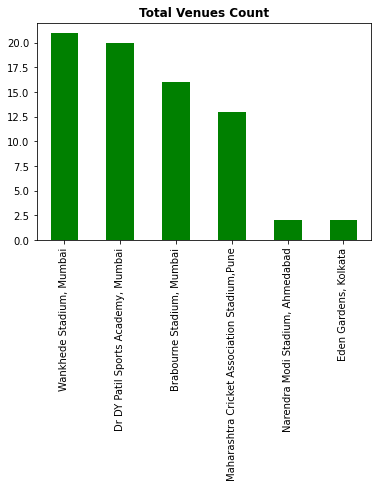

In [14]:
## venues and match count
ipl_22['venue'].value_counts().plot(kind='bar',color='g')
plt.title("Total Venues Count",fontweight='bold')
plt.show()

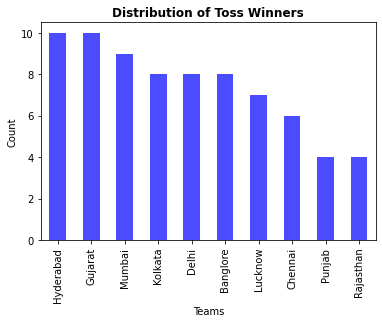

In [15]:
ipl_22['toss_winner'].value_counts().plot(kind='bar',color='b',alpha=0.7)
plt.xlabel("Teams")
plt.ylabel("Count")
plt.title("Distribution of Toss Winners",fontweight='bold')
plt.xlabel("Teams")
plt.show()

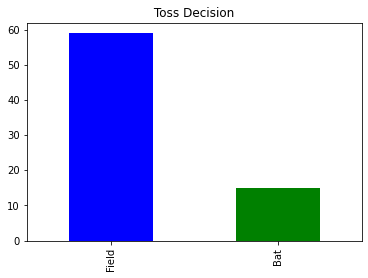

In [16]:
## Toss Decision..
toss=ipl_22['toss_decision'].value_counts()

ax=toss.plot(kind='bar',color=['b','g'])
plt.title(" Toss Decision ")
plt.show()

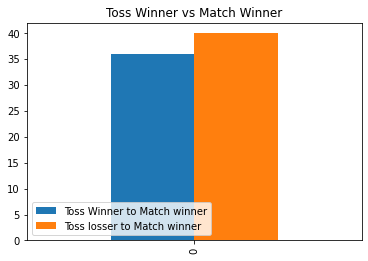

In [17]:
# Get Toss Winner vs Match winner ..

TW_W=len(ipl_22.query('toss_winner==match_winner'))

data=[[TW_W,76-TW_W]]
df=pd.DataFrame(data,columns=['Toss Winner to Match winner','Toss losser to Match winner'])
df.plot(kind='bar')
plt.title("Toss Winner vs Match Winner")
plt.legend(loc='lower left')
plt.show()

In [18]:
#
ipl_22['first_bat']=np.where(ipl_22['toss_decision']=='Bat', ipl_22['toss_winner'],
                             np.where(ipl_22['toss_winner']==ipl_22['team1'],ipl_22.team2,ipl_22.team1))
ipl_22['second_bat']=np.where(ipl_22['toss_decision']=='Field',ipl_22['toss_winner'],
                              np.where(ipl_22['toss_winner']==ipl_22['team1'],ipl_22.team2,ipl_22.team1),
                              )

In [19]:
df=ipl_22.filter(items=['toss_winner','toss_decision','match_winner','first_bat','second_bat'])
first_bat_wins=len(df[df['match_winner']==df['first_bat']])
second_bat_wins=len(df[df['match_winner']==df['second_bat']])
df

,toss_winner,toss_decision,match_winner,first_bat,second_bat
match_id,,,,,
1,Kolkata,Field,Kolkata,Chennai,Kolkata
2,Delhi,Field,Delhi,Mumbai,Delhi
3,Punjab,Field,Punjab,Banglore,Punjab
4,Gujarat,Field,Gujarat,Lucknow,Gujarat
5,Hyderabad,Field,Rajasthan,Rajasthan,Hyderabad
...,...,...,...,...,...
70,Hyderabad,Bat,Punjab,Hyderabad,Punjab
71,Gujarat,Field,Gujarat,Rajasthan,Gujarat
72,Lucknow,Field,Banglore,Banglore,Lucknow


## let's see how toss decision gone in favour of result. 

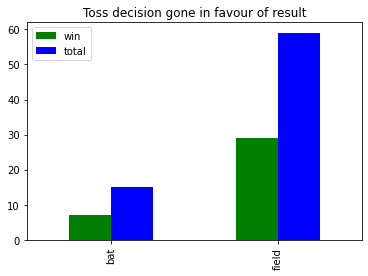

In [20]:
## field

field=ipl_22[ipl_22['toss_decision']=='Field']
field_favour=field.query('match_winner == toss_winner')

## batting

bat=ipl_22[ipl_22['toss_decision']=='Bat']
bat_favour=bat.query('match_winner == toss_winner')

data=pd.DataFrame([[len(bat_favour),len(bat)],[len(field_favour),len(field)]],columns=['win','total'],index=['bat','field'])
data.plot(kind='bar',color=['g','b'])
plt.title("Toss decision gone in favour of result")
plt.show()

<AxesSubplot:xlabel='first_bat', ylabel='count'>

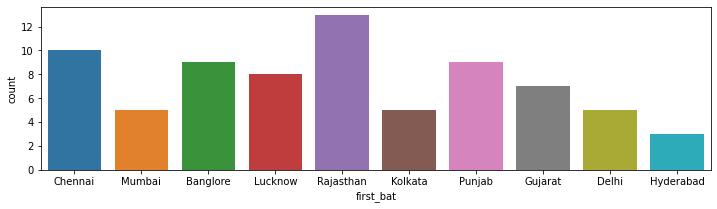

In [21]:
## count of Teams which are batting first..
plt.figure(figsize=(12,3))
sns.countplot(x="first_bat",data=ipl_22)

<AxesSubplot:xlabel='second_bat', ylabel='count'>

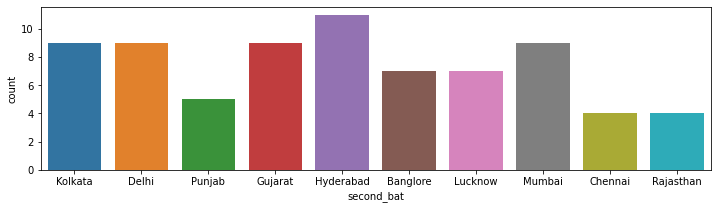

In [22]:
## count of teams batting second
plt.figure(figsize=(12,3))
sns.countplot(x="second_bat",data=df)

<AxesSubplot:ylabel='venue,match_winner'>

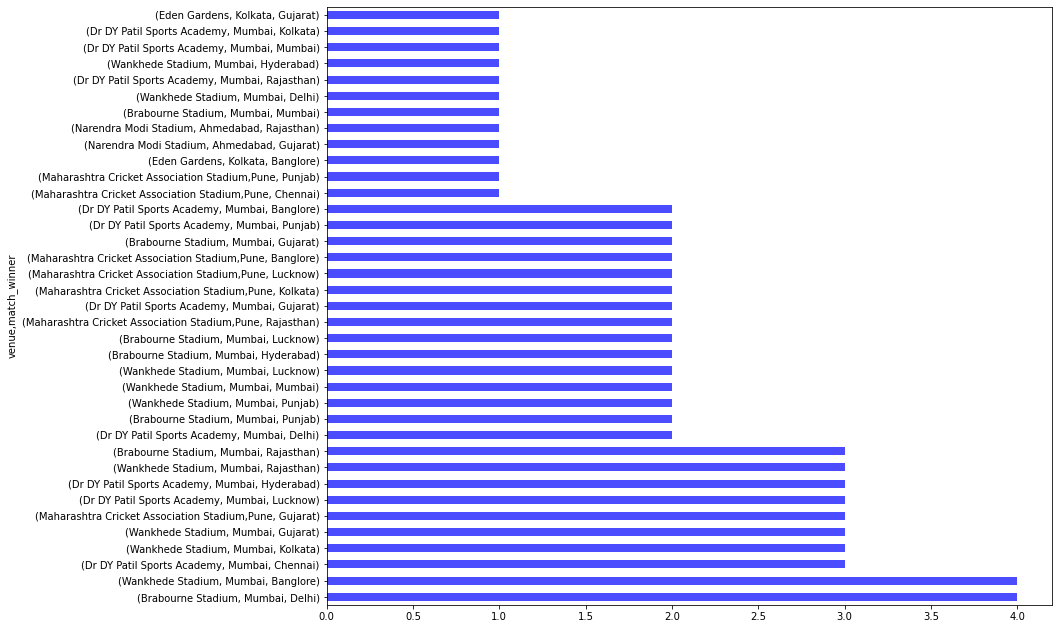

In [23]:
## teams_wins according to venues
t=ipl_22[['venue','match_winner']]
x=t.value_counts()
plt.figure(figsize=(13,11))
x.plot(kind='barh',color='#0000FF',alpha=0.7)

In [24]:
## descriptive stats 
ipl_22.groupby('won_by').describe().transpose()

won_by                         Runs     Wickets
first_ings_score  count   37.000000   37.000000
                  mean   186.405405  155.837838
                  std     21.337837   27.849310
                  min    144.000000   68.000000
                  25%    171.000000  146.000000
                  50%    189.000000  157.000000
                  75%    207.000000  169.000000
                  max    222.000000  210.000000
first_ings_wkts   count   37.000000   37.000000
                  mean     5.540541    6.729730
                  std      2.142099    2.168572
                  min      0.000000    2.000000
                  25%      4.000000    5.000000
                  50%      6.000000    6.000000
                  75%      7.000000    8.000000
                  max      9.000000   10.000000
second_ings_score count   37.000000   37.000000
                  mean   158.459459  158.621622
                  std     31.572311   27.274684
                  min     82.000000   72.000000
                  25%    133.000000  150.000000
                  50%    160.000000  160.000000
                  75%    186.000000  173.000000
                  max    210.000000  211.000000
second_ings_wkts  count   37.000000   37.000000
                  mean     8.351351    4.000000
                  std      1.337830    1.615893
                  min      5.000000    1.000000
                  25%      8.000000    3.000000
                  50%      8.000000    4.000000
                  75%      9.000000    5.000000
                  max     10.000000    7.000000
margin            count   37.000000   37.000000
                  mean    27.945946    6.000000
                  std     23.085525    1.615893
                  min      2.000000    3.000000
                  25%     12.000000    5.000000
                  50%     18.000000    6.000000
                  75%     44.000000    7.000000
                  max     91.000000    9.000000
highscore         count   37.000000   37.000000
                  mean    77.216216   66.216216
                  std     22.331014   17.562800
                  min     46.000000   28.000000
                  25%     59.000000   55.000000
                  50%     70.000000   67.000000
                  75%     95.000000   75.000000
                  max    140.000000  106.000000

### Target to defend 

<AxesSubplot:>

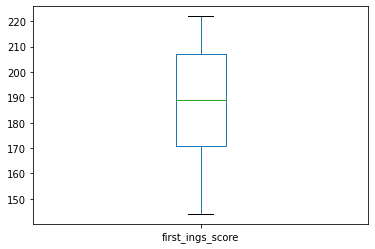

In [25]:
ipl_22.query('match_winner==first_bat').first_ings_score.plot(kind='box')
## It describes First ings score b/w 170 to 208 ensures defending safe target ...

### Target for a comfortable chasing

<AxesSubplot:>

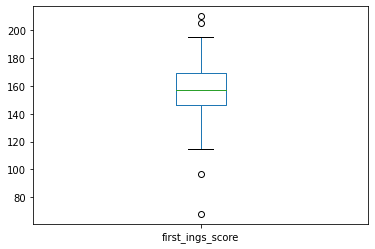

In [26]:
ipl_22.query('match_winner==second_bat').first_ings_score.plot(kind='box')
## teams comfortable chased when target is b/w 142 to 161

## wickets picked by first batting team to win.

<AxesSubplot:>

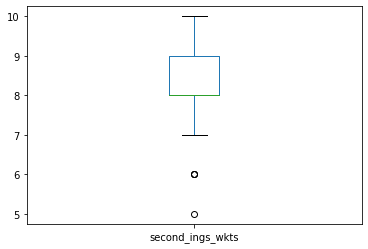

In [27]:
ipl_22.query('match_winner==first_bat').second_ings_wkts.plot(kind='box')

## wickets picked by second batting team to win.

<AxesSubplot:>

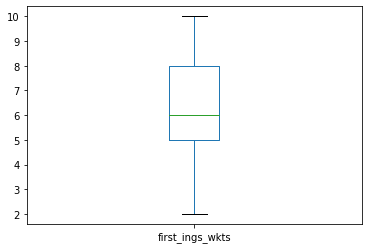

In [28]:
ipl_22.query('match_winner==second_bat').first_ings_wkts.plot(kind='box')

In [29]:
# Most no of Man of the Match awards
ipl_22.player_of_the_match.value_counts().head(10)

Kuldeep Yadav        4
Jos Buttler          3
Umran Malik          2
Jasprit Bumrah       2
David Miller         2
Yuzvendra Chahal     2
Wanindu Hasaranga    2
Rahul Tripathi       2
Quinton de Kock      2
K L Rahul            2
Name: player_of_the_match, dtype: int64

In [30]:
## most times top_scorer 
ipl_22.top_scorer.value_counts().head(10)

Jos Buttler        7
Quinton de Kock    5
KL Rahul           4
Shubman Gill       4
David Warner       3
Ishan Kishan       3
Faf du Plessis     3
W. Saha            3
Mitchell Marsh     2
Shikhar Dhawan     2
Name: top_scorer, dtype: int64

In [31]:
ipl_22.best_bowling.value_counts().head(10)

Yuzvendra Chahal    5
Rashid Khan         4
Avesh Khan          3
Kagiso Rabada       3
Kuldeep Yadav       3
Jasprit Bumrah      3
Josh Hazlewood      3
T Natarajan         3
Andre Russell       2
Hardik Pandya       2
Name: best_bowling, dtype: int64

In [32]:
## top 5 highest scores  in ipl 2022
ipl_22[['top_scorer','highscore']].sort_values("highscore",ascending=False).head(5)

,top_scorer,highscore
match_id,,
66,Quinton de Kock,140
34,Jos Buttler,116
72,Rajat Patidar,112
73,Jos Buttler,106
30,Jos Buttler,103


In [33]:
## top 5 best bowling figures in ipl 2022
ipl_22[['best_bowling','best_bowling_figure']].sort_values("best_bowling_figure",ascending=False).head(5)

,best_bowling,best_bowling_figure
match_id,,
30,Yuzvendra Chahal,5--40
40,Umran Malik,5--25
54,Wanindu Hasaranga,5--18
56,Jasprit Bumrah,5--10
35,Andre Russell,4--5


In [34]:
# get all details of a particular team...
def campaign(team_name):
    total=ipl_22[(ipl_22.team1==team_name) | (ipl_22.team2==team_name) ]
    wins=len(total.loc[total.match_winner==team_name])
    loses=len(total)-wins
    toss_wins=len(total[total.toss_winner==team_name])
    toss_wins_match_wins=len(total[(total.match_winner==team_name) & (total.toss_winner==team_name)])
    first_bat_wins=len(total[(total['first_bat']==team_name) & (total.match_winner==team_name)] )# second _wins...
    return [total,wins,loses,toss_wins,toss_wins_match_wins,first_bat_wins,wins-first_bat_wins]

In [35]:
def points_table(t,team1):
    k=pd.DataFrame()
    k['team']=team1
    k['opponent']=np.where(t['team1']!=team1, t['team1'],t['team2'])
    k['win_by_team']=np.where(t.match_winner==team1,1,0)
    return k.groupby('opponent').agg(
    match_palyed=pd.NamedAgg(column="win_by_team", aggfunc="count"),
    wins=pd.NamedAgg(column="win_by_team", aggfunc="sum"))

In [37]:
def genrate(team_name):
    stats=campaign(team_name)
    plt.style.use("seaborn")
    plt.tight_layout()
    fig = plt.figure()
    text = f"{team_name} in the IPL 2022"
    fig.suptitle(t=text, x=.7, y=1.7, fontsize=18, fontweight="bold")
    ax1 = fig.add_axes([0,0,.7,1])
    ax2 = fig.add_axes([0.8, 0, .7, 1])
    ax3 = fig.add_axes([0, 1.1, .7, 0.5])
    ax4 = fig.add_axes([0.8, 1.1, .7, 0.5])
    #ax5 = fig.add_axes([0.8, 1.1, .7, 0.5])
    ax1.margins(x=.1,y=.1)
    ax2.margins(x=.1,y=.1)
    
    # total wins vs loses.
    values=[stats[1],stats[2]]
    labels=['Wins','Loses']
    ax3.bar(labels,values,color=['c','b'],width=0.4)
    ax3.set_title("Total Wins vs Loses",fontsize=14,fontweight="bold")
    
    # toss_wins vs actual wins...
    values=[stats[3]-stats[4],stats[4]]
    labels=['Toss_wins_match_loss','Toss_wins_match_wins']
    ax4.pie(values,labels = labels, autopct='%.0f%%')
    ax4.set_title("Toss Decision leads to Win",fontsize=14,fontweight="bold")
    
    # defending vs Chasing wins..
    values=[int(stats[5]),int(stats[6])]
    labels=['Runs','Wickets']
    ax1.bar(labels,values,color=['g','b'],width=0.4)
    ax1.set_title("Won_By",fontsize=14,fontweight="bold")
    
    # first_innigs_avg when loss && fisrt_innings_avg when win
    
    t=stats[0][(stats[0].match_winner==team_name) | (stats[0].first_bat==team_name)]
    k=stats[0][(stats[0].match_winner!=team_name) | (stats[0].first_bat==team_name)]
    m=stats[0][(stats[0].match_winner==team_name) | (stats[0].second_bat==team_name)]
    j=stats[0][(stats[0].match_winner!=team_name) | (stats[0].second_bat==team_name)]
    data=[t.first_ings_score,k.first_ings_score,m.first_ings_score,j.first_ings_score]
    ax2.boxplot(data,labels=['team wins','team loss','opponent win','opponent loss'])
    ax2.set_title('First Innnigs Score',fontsize=14,fontweight="bold")
    
    ## wins according to the oppostion
    k=points_table(stats[0][['team1','team2','match_winner']],team_name)
    k.plot(kind='bar')
    plt.title(team_name + "'s Opponent in ipl 2022",fontweight="bold")
    plt.show()

<Figure size 576x396 with 0 Axes>

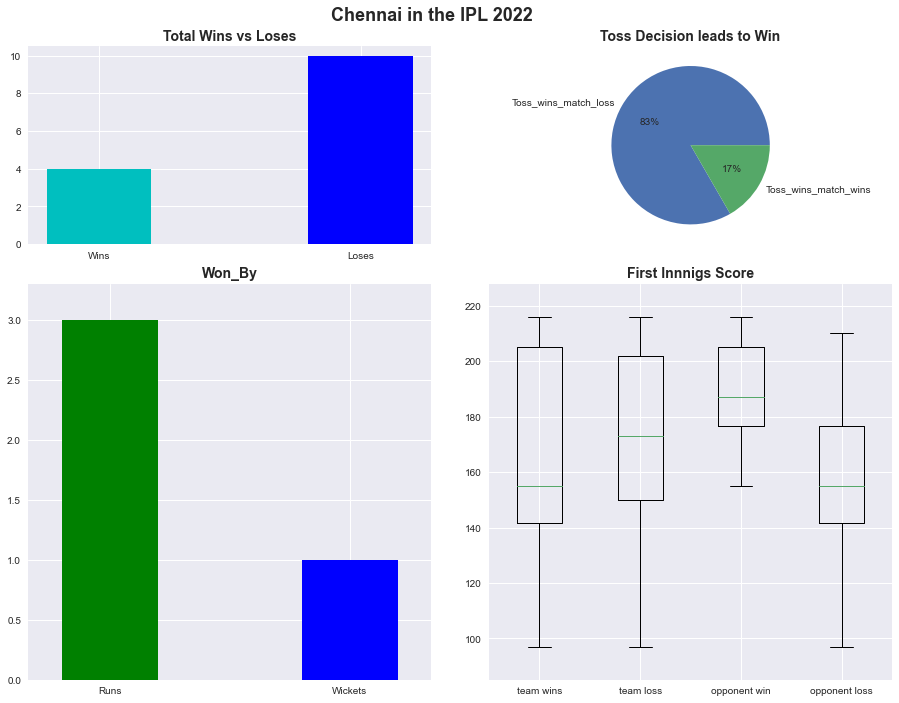

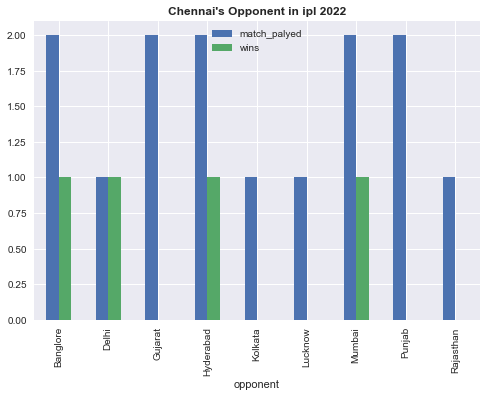

In [39]:
genrate('Chennai')

<Figure size 576x396 with 0 Axes>

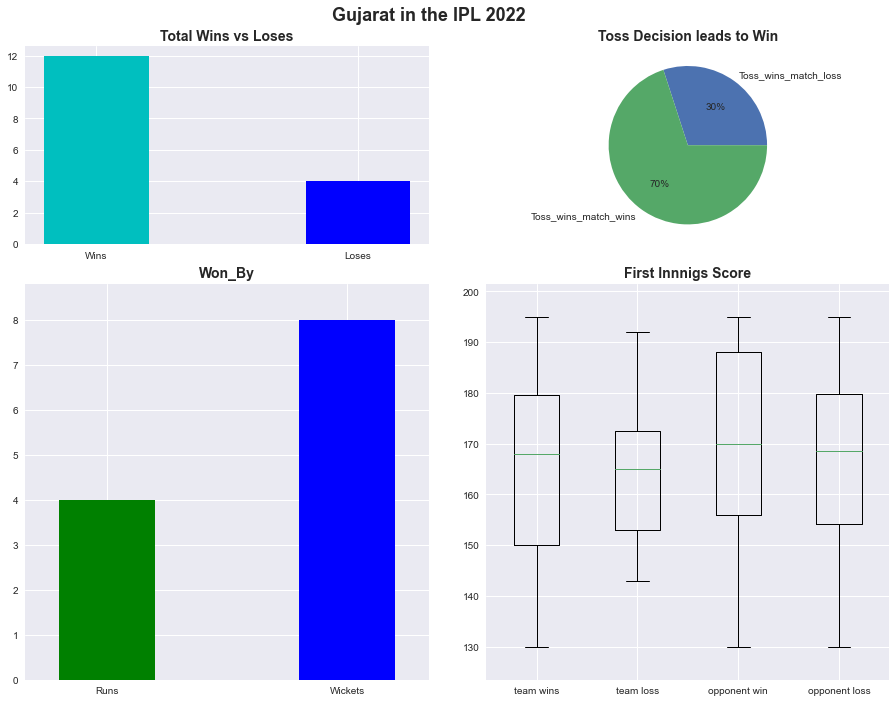

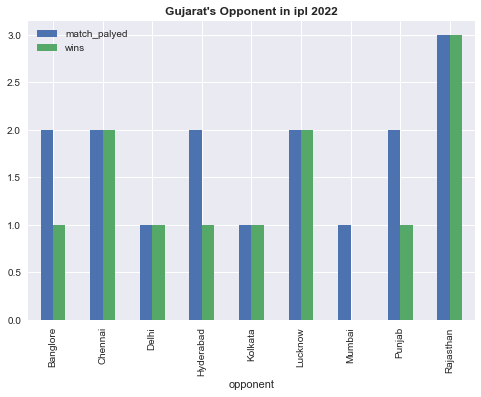

In [40]:
genrate('Gujarat')